# Code demo for Physiopy's ReproNim webinar: <br>"Physiopy Community: working towards accessible and reproducible data usage in neuroimaging studies"

This tutorial is showcasing three python library's developped and/or maintained by the [Physiopy community](https://physiopy.github.io/):
<ul>
<li><a href="https://github.com/physiopy/phys2bids">phys2bids</a>: to format physiological data in BIDS</li>
<li><a href="https://github.com/physiopy/peakdet">peakdet</a>: to preprocess physiological data and perform peak detection</li>
<li><a href="https://github.com/physiopy/phys2denoise">phys2denoise</a>: to prepare physiological data for fMRI denoising</li>
</ul>

<div class="alert alert-block alert-warning">
<b>Note on the recorded version of this tutorial</b>
<br>Note that the recorded version of this tutorial will demonstrate the usage of phys2bids through the command line, while below we show an equivalent use case in python! For more details about phys2bids usage, please take a look at the <a href="https://phys2bids.readthedocs.io/en/latest/">documentation</a> !
</div>

## Import dependencies

In [1]:
import os
import matplotlib.pyplot as plt
from physutils.io import load_from_bids, load_physio
from phys2bids.phys2bids import phys2bids
from peakdet import Physio, operations, io

## Convert our raw acq file in bids format

To convert our raw acq file in bids format, we will use `phys2bids`. This library can be use as a CLI directly in the terminal or inside a python script or jupyter notebook. For more details, take a look at the [documentation](https://phys2bids.readthedocs.io/en/latest/) !

### Let's deal with some data

In [2]:
# Let's first create our output directory
bids_path = 'data/multifreq_bids'

# If the directory does not exist, create it !
if not os.path.exists(bids_path):
    os.makedirs(bids_path)

In [3]:
# Checkout the file info
phys2bids(
    'data/multifreq.acq',
    info = True,
    outdir = bids_path,
)

INFO       Currently running phys2bids version 2.10.0
INFO       Input file is data/multifreq.acq
INFO       File extension is .acq
WARNING    If both acq and txt files exist in the path, acq will be selected.
INFO       Reading the file /home/user/Documents/physio/repronim2024physiopy/data/multifreq.acq
INFO       00. Channel RESP - RSP100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       01. Channel PULSE - Custom, DA100C: 83550 samples, 625.0 samples/sec, loaded: True
INFO       02. Channel MR TRIGGER - Custom, HLT100C - A 5: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       03. Channel PPG100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       04. Channel CO2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       05. Channel O2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       Running automatic trigger detection.
INFO       Matching channel names with known trigger names first.
INFO       MR TRIGGER - Custom, HLT100C - A 5 

<div class="alert alert-block alert-info">
<b>CLI version</b>
<pre><code>phys2bids -in data/multifreq.acq -out data/multifreq_bids -info</code></pre>
</div>

In [4]:
# Let's check what we have inside our output directory
def print_tree(outdir):
    # Adapted from: https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python
    for root, dirs, files in os.walk(outdir):
        level = root.replace(outdir, '').count(os.sep)
        print(f"{' ' * 4*level}{os.path.basename(root)}")
        for file in files:
            print(f"{' ' * 4*(level+1)}{os.path.basename(file)}")


print_tree(bids_path)

multifreq_bids
    code
        conversion
            call.sh
            phys2bids_2024-10-31T125429.tsv
            multifreq.png


In [5]:
# Let's bids-ify the data
phys2bids(
    'data/multifreq.acq',
    info = False,
    outdir = bids_path,
    num_timepoints_expected = 60,
    tr = 1.5,
    chsel = [1, 2, 3, 4],
    sub = '002',
    ses = '01',
    heur_file = 'data/heur_tutorial.py'
)

INFO       Currently running phys2bids version 2.10.0
INFO       Input file is data/multifreq.acq
INFO       File extension is .acq
WARNING    If both acq and txt files exist in the path, acq will be selected.
INFO       Reading the file /home/user/Documents/physio/repronim2024physiopy/data/multifreq.acq
INFO       00. Channel RESP - RSP100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       01. Channel PULSE - Custom, DA100C: 83550 samples, 625.0 samples/sec, loaded: True
INFO       02. Channel MR TRIGGER - Custom, HLT100C - A 5: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       03. Channel PPG100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       04. Channel CO2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       05. Channel O2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       Running automatic trigger detection.
INFO       Matching channel names with known trigger names first.
INFO       MR TRIGGER - Custom, HLT100C - A 5 

<div class="alert alert-block alert-info">
<b>CLI version</b>
<pre><code>phys2bids -in data/multifreq.acq -out data/multifreq_bids -ntp 60 -tr 1.5 -chsel 1 2 3 4 -sub 002 -ses 01 -heur data/heur_tutorial.py</code></pre>
</div>

In [6]:
# Let's check what we have now inside our output directory
print_tree(bids_path)

multifreq_bids
    dataset_description.json
    README
    participants.tsv
    sub-002
        ses-01
            func
                sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.json
                sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.tsv.gz
                sub-002_ses-01_task-SomeTask_recording-625Hz_physio.json
                sub-002_ses-01_task-SomeTask_recording-625Hz_physio.tsv.gz
    code
        conversion
            phys2bids_2024-10-31T125439.tsv
            heur_tutorial.py
            call.sh
            sub-002_ses-01_task-SomeTask_recording-625Hz_physio.log
            phys2bids_2024-10-31T125429.tsv
            multifreq.png
            multifreq_sub-002_ses-01_trigger_time.png
            sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.log


## Preprocessing time !

### Let's load our data

In [3]:
# Let's load our timeseries from the phys2bids output !

data = load_from_bids(
    bids_path, 
    subject='002',
    session='01',
    task='SomeTask',
    recording='10000Hz')

2024-10-31 15:37:07.209 | DEBUG    | physutils.io:load_from_bids:73 - BIDS file found: [<BIDSDataFile filename='/home/user/Documents/physio/repronim2024physiopy/data/multifreq_bids/sub-002/ses-01/func/sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.tsv.gz'>]
2024-10-31 15:37:07.212 | DEBUG    | physutils.io:load_from_bids:87 - Loaded structure contains columns: ['time', 'RESP - RSP100C', 'MR TRIGGER - Custom, HLT100C - A 5', 'PPG100C']
2024-10-31 15:37:08.126 | DEBUG    | physutils.physio:__init__:293 - Initializing new Physio object
2024-10-31 15:37:08.127 | WARNING  | physutils.io:load_from_bids:133 - MRI trigger characteristics extraction not yet implemented
2024-10-31 15:37:08.130 | DEBUG    | physutils.physio:__init__:293 - Initializing new Physio object
2024-10-31 15:37:08.134 | DEBUG    | physutils.physio:__init__:293 - Initializing new Physio object


In [4]:
print(data)

{'RESP - RSP100C': Physio(size=1128313, fs=10000.0), 'MR TRIGGER - Custom, HLT100C - A 5': Physio(size=1128313, fs=10000.0), 'PPG100C': Physio(size=1128313, fs=10000.0)}


<div class="alert alert-block alert-info">
<b>What do we have here ?</b>
<br><code>data</code> is a dictionnary. Each element of this dictionnary corresponds to one channel:
<ul>
    <li>RESP - RSP100C</li>
    <li>MR  TRIGGER - Custom, HLT100C - A5</li>
    <li>PPG100C</li>
</ul>
The value associated with each key is a <a href="https://peakdet.readthedocs.io/en/latest/api.html#peakdet.Physio"><code>Physio</code></a> object. For the rest of this tutorial, we will focus on the PPG data.
</div>

In [5]:
phys_ppg = Physio(data['PPG100C'].data, fs = data['PPG100C'].fs)
print(phys_ppg)

Physio(size=1128313, fs=10000.0)


In [6]:
# We can access out data by calling the `data` attribute on our physio object
print(f'Data: {phys_ppg.data}')
# As well as its corresponding sampling rate by calling the `fs` attribute
print(f'Sampling rate: {phys_ppg.fs}')

Data: [ 0.08483887  0.08514404  0.08483887 ... -0.01373291 -0.01464844
 -0.01403809]
Sampling rate: 10000.0


### Let's now visualize our data

Text(0, 0.5, 'Amplitude')

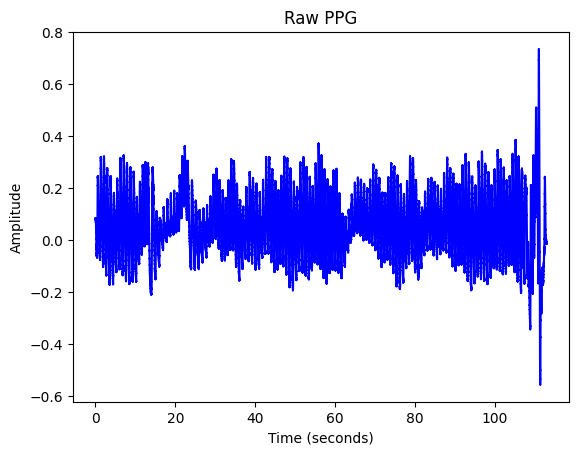

In [7]:
ax = operations.plot_physio(phys_ppg)
ax.set_title("Raw PPG")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

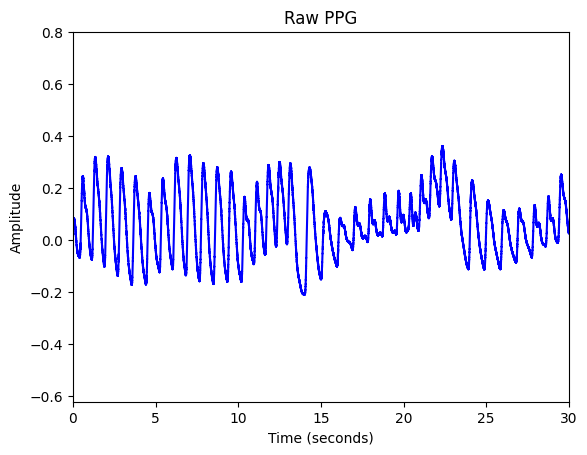

In [9]:
# Maybe just the first 20 seconds
ax = operations.plot_physio(phys_ppg)
ax.set_title("Raw PPG")
ax.set_xlim(0,30)
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude")

### Let's try cleaning our signal

In [8]:
# First let's downsample our signal
phys_ppg = operations.interpolate_physio(phys_ppg, target_fs=250)
print(phys_ppg.history)

[('interpolate_physio', {'target_fs': 250})]


<div class="alert alert-block alert-warning">
<b>Panic at the physio: how to deal with lack of standardization ?</b>
<br>Preprocessing physiological data is a grand endavor: each step of the preprocessing requires making a lot of decisions ! To what frequency should we downsample our data, when should we downsampled our data, what kind of filtering should we do, what are the chosen cutoffs, order, etc. And this is only to get our data ready to extract the features ! The amount of choices that researchers need to do after just continue to grow... ¯\_(ツ)_/¯

<br>The lack of reporting standards makes it quite hard to try to reproduce what have been done previously. `peakdet` is offering a solution by storing and saving all the steps that have been applied to the data through the `history` attribute !
</div>

In [9]:
# We can filter out some frequencies using the `filter_physio` function
phys_ppg = operations.filter_physio(phys_ppg, cutoffs=[0.5, 8], method='bandpass', order=3)
print(phys_ppg.history)

[('interpolate_physio', {'target_fs': 250}), ('filter_physio', {'cutoffs': [0.5, 8], 'method': 'bandpass', 'order': 3})]


Text(0, 0.5, 'Amplitude')

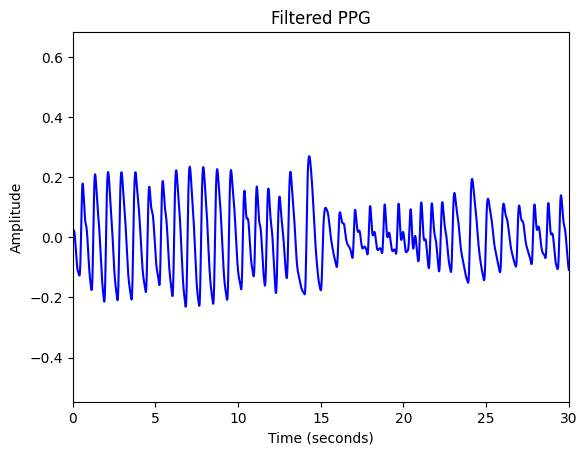

In [10]:
ax = operations.plot_physio(phys_ppg)
ax.set_title("Filtered PPG")
ax.set_xlim(0,30)
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude")

## We can now find our systolic peaks !

In [11]:
phys_ppg = operations.peakfind_physio(phys_ppg, thresh=0.2, dist=None)

In [12]:
phys_ppg.history

[('interpolate_physio', {'target_fs': 250}),
 ('filter_physio', {'cutoffs': [0.5, 8], 'method': 'bandpass', 'order': 3}),
 ('peakfind_physio', {'dist': None, 'thresh': 0.2})]

Text(0, 0.5, 'Amplitude')

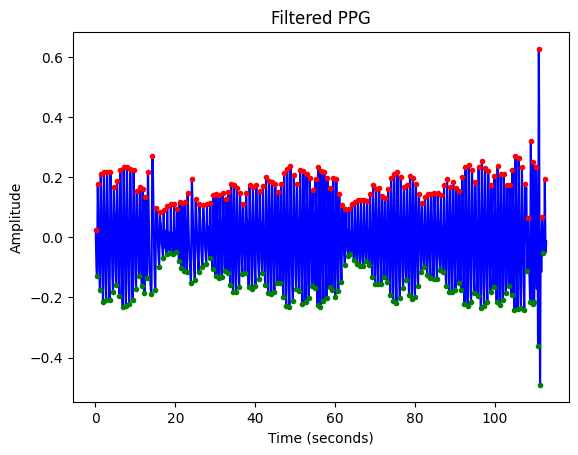

In [13]:
ax = operations.plot_physio(phys_ppg)
ax.set_title("Filtered PPG")
#ax.set_xlim(0, 30)
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude")

## Automation is useful, but manual check is necessary !

In [41]:
%matplotlib qt
phys_ppg = operations.edit_physio(phys_ppg)

In [42]:
phys_ppg.history

[('interpolate_physio', {'target_fs': 250}),
 ('filter_physio', {'cutoffs': [0.5, 8], 'method': 'bandpass', 'order': 3}),
 ('peakfind_physio', {'dist': None, 'thresh': 0.2}),
 ('delete_peaks',
  {'remove': [27065, 27240, 27398, 27566, 27740, 27935, 28114]}),
 ('add_peaks', {'add': [27566]})]

<div class="alert alert-block alert-warning">
<b><code>edit_physio</code> is not working in jupyter notebook ?</b>
<br>If the GUI is not working in jupyter notebook, please try running the python code in your terminal.
</div>

**Let's check what is now happening in the history of our Physio object**

In [16]:
# Let's save our hard work !

bids_derivatives = 'data/multifreq_derivatives'
sub = '002'
ses = '01'

# If the subject directory does not exist, create it !
if not os.path.exists(os.path.join(bids_derivatives, f'sub-{sub}', f'ses-{ses}')):
    os.makedirs(os.path.join(bids_derivatives, f'sub-{sub}', f'ses-{ses}'))

io.save_physio(os.path.join(bids_derivatives, f'sub-{sub}', f'ses-{ses}', f'sub-{sub}_ses-{ses}_task-SomeTask_recording-ppg_desc-preproc.phys'), phys_ppg)

<div class="alert alert-block alert-warning">
<b>Coming soon !</b>
<br> We are currently working on a BIDS app-ified version of <code>peakdet</code>, called <code>prep4phys</code>. The <code>Physio</code> object will remain in <code>prep4phys</code>, but the way it handles inputs and outputs will change to ensure interoperability between <code>phys2bids</code>, <code>phys2denoise</code>, and <code>prep4phys</code>. Other functionalities will be added on top of the current <code>peakdet</code> ones. 
</div>

## Preparing physiological models

<div class="alert alert-block alert-warning">
<b>Phys2denoise</b>
<br>In the following section, we will use <code>phys2denoise</code> to compute metrics using the ppg signal previously preprocessed and the corresponding extracted features (peaks). In addition to all the integrated cardiac metrics, <code>phys2denoise</code> also supports respiratory data. For more details, take a look at <a href="https://phys2denoise.readthedocs.io/en/latest/">the documentation</a> !
</div>

In [17]:
# To extract metrics from our signal, we'll use `phys2denoise`
from phys2denoise.metrics.cardiac import heart_rate_variability, heart_rate
from phys2denoise.metrics.utils import export_metric

In [18]:
# Let's load our preprocessed data
filtered_ppg = io.load_physio(os.path.join(bids_derivatives, f'sub-{sub}', f'ses-{ses}', f'sub-{sub}_ses-{ses}_task-SomeTask_recording-ppg_desc-preproc.phys'), allow_pickle=True)
print(filtered_ppg.history)

[('interpolate_physio', {'target_fs': 250}), ('filter_physio', {'cutoffs': [0.5, 8], 'method': 'bandpass', 'order': 3}), ('peakfind_physio', {'dist': None, 'thresh': 0.2}), ('delete_peaks', {'remove': [27065, 27240, 27398, 27566, 27740, 27935, 28114]}), ('add_peaks', {'add': [27566]})]


In [19]:
# Compute the heart rate variability
hrv = heart_rate_variability(filtered_ppg.data, filtered_ppg.peaks, filtered_ppg.fs)

2024-10-31 15:38:01.618 | DEBUG    | physutils.io:load_physio:194 - Instantiating Physio object from numpy array
2024-10-31 15:38:01.621 | WARNING  | physutils.io:load_physio:196 - Loading data from a numpy array without providing ahistory will render reproducibility functions useless! Continuing anyways.
2024-10-31 15:38:01.624 | DEBUG    | physutils.physio:__init__:293 - Initializing new Physio object
2024-10-31 15:38:04.766 | DEBUG    | phys2denoise.metrics.responses:crf:62 - Time stamps: [0.]
2024-10-31 15:38:04.767 | DEBUG    | phys2denoise.metrics.responses:crf:65 - CRF: [-1.]


<div class="alert alert-block alert-info">
<b>Variability in heart rate variability</b>
<br> There are different ways to calculate <b>hrv</b>. Currently, <code>phys2denoise</code> is computing the standard deviation of the inverse of the time interval
between two heart beats.
</div>

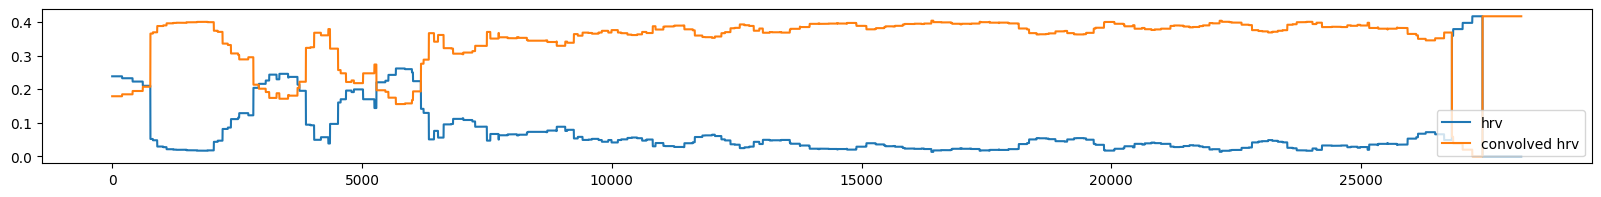

In [20]:
# Let's see what we've got
plt.figure(figsize=(20, 2))
plt.plot(hrv, label=["hrv", "convolved hrv"])
plt.legend(loc="lower right")
plt.show()

In [48]:
# Let's again save our hard work !
export_metric(
    hrv, filtered_ppg.fs, tr=1.5, fileprefix=os.path.join(bids_derivatives, f'sub-{sub}', f'ses-{ses}', f'sub-{sub}_ses-{ses}_task-SomeTask_recording-ppg_desc-hrv')
)

'data/multifreq_derivatives/sub-002/ses-01/sub-002_ses-01_task-SomeTask_recording-ppg_desc-hrv'

## Wanna contribute ?
Take a look at our [contributor guide](https://physiopy.github.io/contributors-guide/) !

<h2>
    And a big thank you to all the people that have contributed to at least one of those libraries !
</h2>

<table>
  <tbody>
    <tr>
      <td align="center" valign="top" width="5%"><a href="https://github.com/danalclop"><img src="https://avatars0.githubusercontent.com/u/38854309?v=4?s=100" width="100px;" alt="Daniel Alcalá"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/AyyagariA"><img src="https://avatars1.githubusercontent.com/u/50453337?v=4?s=100" width="100px;" alt="Apoorva Ayyagari"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/62442katieb"><img src="https://avatars1.githubusercontent.com/u/14095475?v=4?s=100" width="100px;" alt="Katie Bottenhorn"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="http://brightlab.northwestern.edu"><img src="https://avatars2.githubusercontent.com/u/32640425?v=4?s=100" width="100px;" alt="Molly Bright"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/CesarCaballeroGaudes"><img src="https://avatars1.githubusercontent.com/u/7611340?v=4?s=100" width="100px;" alt="Cesar Caballero Gaudes"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/ineschh"><img src="https://avatars.githubusercontent.com/u/72545702?v=4?s=100" width="100px;" alt="Inés Chavarría"/><br /></a><br /></td>
    </tr>
    <tr>
      <td align="center" valign="top" width="5%"><a href="https://github.com/nw-duncan"><img src="https://avatars.githubusercontent.com/u/23524584?v=4?s=100" width="100px;" alt="Niall Duncan"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/emdupre"><img src="https://avatars3.githubusercontent.com/u/15017191?v=4?s=100" width="100px;" alt="Elizabeth DuPre"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/vinferrer"><img src="https://avatars2.githubusercontent.com/u/38909338?v=4?s=100" width="100px;" alt="Vicente Ferrer"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/eril892"><img src="https://avatars.githubusercontent.com/u/91672536?v=4?s=100" width="100px;" alt="Raphaël Fournier"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/afni-dglen"><img src="https://avatars.githubusercontent.com/u/10454715?v=4?s=100" width="100px;" alt="Daniel Glen"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/yarikoptic"><img src="https://avatars.githubusercontent.com/u/39889?v=4?s=100" width="100px;" alt="Yaroslav Halchenko"/><br /></a><br /></td>
    </tr>
    <tr>
      <td align="center" valign="top" width="5%"><a href="http://soichi.us"><img src="https://avatars3.githubusercontent.com/u/923896?v=4?s=100" width="100px;" alt="Soichi Hayashi"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/viacovella"><img src="https://avatars1.githubusercontent.com/u/1639782?v=4?s=100" width="100px;" alt="Vittorio Iacovella"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/maestroque"><img src="https://avatars.githubusercontent.com/u/74024609?v=4?s=100" width="100px;" alt="George Kikas"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/TomasLenc"><img src="https://avatars.githubusercontent.com/u/10827440?v=4?s=100" width="100px;" alt="Tomas Lenc"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/sangfrois"><img src="https://avatars0.githubusercontent.com/u/38385719?v=4?s=100" width="100px;" alt="François Lespinasse"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/rmarkello"><img src="https://avatars0.githubusercontent.com/u/14265705?v=4?s=100" width="100px;" alt="Ross Markello"/><br /></a><br /></td>
    </tr>
    <tr>
      <td align="center" valign="top" width="5%"><a href="https://github.com/m-miedema"><img src="https://avatars.githubusercontent.com/u/39968233?v=4?s=100" width="100px;" alt="m-miedema"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/smoia"><img src="https://avatars.githubusercontent.com/u/35300580?v=4?s=100" width="100px;" alt="Stefano Moia"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/robertoostenveld"><img src="https://avatars1.githubusercontent.com/u/899043?v=4?s=100" width="100px;" alt="Robert Oostenveld"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/AlicePatin"><img src="https://avatars.githubusercontent.com/u/44365985?v=4?s=100" width="100px;" alt="Alice Patin"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/me-pic"><img src="https://avatars.githubusercontent.com/u/77584086?v=4?s=100" width="100px;" alt="Marie-Eve Picard"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/bpinsard"><img src="https://avatars.githubusercontent.com/u/1155388?v=4?s=100" width="100px;" alt="Basile"/><br /></a><br /></td>
    </tr>
    <tr>
      <td align="center" valign="top" width="5%"><a href="https://github.com/drombas"><img src="https://avatars.githubusercontent.com/u/50577357?v=4?s=100" width="100px;" alt="David Romero-Bascones"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/rzlim08"><img src="https://avatars.githubusercontent.com/u/37033997?v=4?s=100" width="100px;" alt="rzlim08"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/tsalo"><img src="https://avatars.githubusercontent.com/u/8228902?v=4?s=100" width="100px;" alt="Taylor Salo"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/RayStick"><img src="https://avatars.githubusercontent.com/u/50215726?v=4?s=100" width="100px;" alt="Rachael Stickland"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/mixue-t"><img src="https://avatars.githubusercontent.com/u/28149789?v=4?s=100" width="100px;" alt="Mi-Xue Tan"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/eurunuela"><img src="https://avatars.githubusercontent.com/u/13706448?v=4?s=100" width="100px;" alt="Eneko Uruñuela"/><br /></a><br /></td>
    </tr>
    <tr>
      <td align="center" valign="top" width="5%"><a href="https://github.com/merelvdthiel"><img src="https://avatars1.githubusercontent.com/u/72999546?v=4?s=100" width="100px;" alt="Merel van der Thiel"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/victox5"><img src="https://avatars1.githubusercontent.com/u/56017659?v=4?s=100" width="100px;" alt="victox5"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://wanghaoting.com/"><img src="https://avatars.githubusercontent.com/u/13743617?v=4?s=100" width="100px;" alt="Hao-Ting Wang"/><br /></a><br /></td>
      <td align="center" valign="top" width="5%"><a href="https://github.com/xl624"><img src="https://avatars0.githubusercontent.com/u/25593301?v=4?s=100" width="100px;" alt="xl624"/><br /></a><br /></td>
    <td align="center" valign="top" width="5%"><a href="https://github.com/kristinazvolanek"><img src="https://avatars.githubusercontent.com/u/54590158?v=4?s=100" width="100px;" alt="Kristina Zvolanek"/><br /></a><br /></td>
    <td align="center" valign="top" width="5%"><a href="https://github.com/marcelzwiers"><img src="https://avatars.githubusercontent.com/u/15156015?v=4?s=100" width="100px;" alt="Marcel Zwiers"/><br /></a><br /></td>
    </tr>
  </tbody>
</table>